# EDA : Analysis Brest Cancer 

In [6]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("./data/data.csv")

<U> Informations</U>

2) Diagnosis (M = malignant, B = benign)

Le dataset est composé de 31 colonnes numeriques et 1 colonne catégorielle. 
Il y a 569 enregistrements.

In [67]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
#data.drop(["Unnamed: 32"], axis=1, inplace=True)

In [10]:
# recherche de NaN dans chaque colonne
pd.DataFrame(data.isna().sum())

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [70]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [71]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [72]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [75]:
diagnosis = data['diagnosis'].value_counts()

In [76]:
diagnosis

B    357
M    212
Name: diagnosis, dtype: int64

([<matplotlib.patches.Wedge at 0x7ff2402fcf10>,
 [Text(-0.4286546999573329, 1.0130425204326268, 'Benin'),
  Text(0.428654605109445, -1.013042560566172, 'Malignant')],
 [Text(-0.23381165452218156, 0.5525686475087055, '62.7%'),
  Text(0.23381160278696997, -0.55256866939973, '37.3%')])

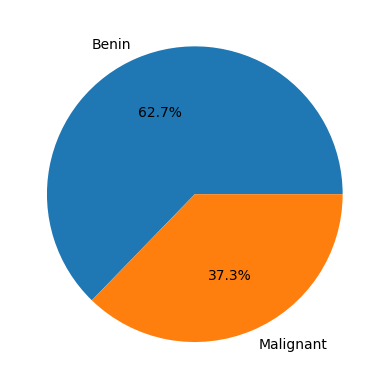

In [20]:
import matplotlib.pyplot as plt
labels = 'Benin','Malignant'
fig, ax = plt.subplots()
ax.pie(diagnosis, labels=labels, autopct='%1.1f%%')

In [18]:
# Custom palette gradient
from matplotlib.colors import LinearSegmentedColormap

# Définition des couleurs de début et de fin du dégradé
start_color = "#ff7f0e"
end_color = "#1f77b4"

# Définition des points de début et de fin du dégradé
cmap_gradient = LinearSegmentedColormap.from_list("", [start_color, end_color])

Text(0.5, 1.0, 'Brest Cancer')

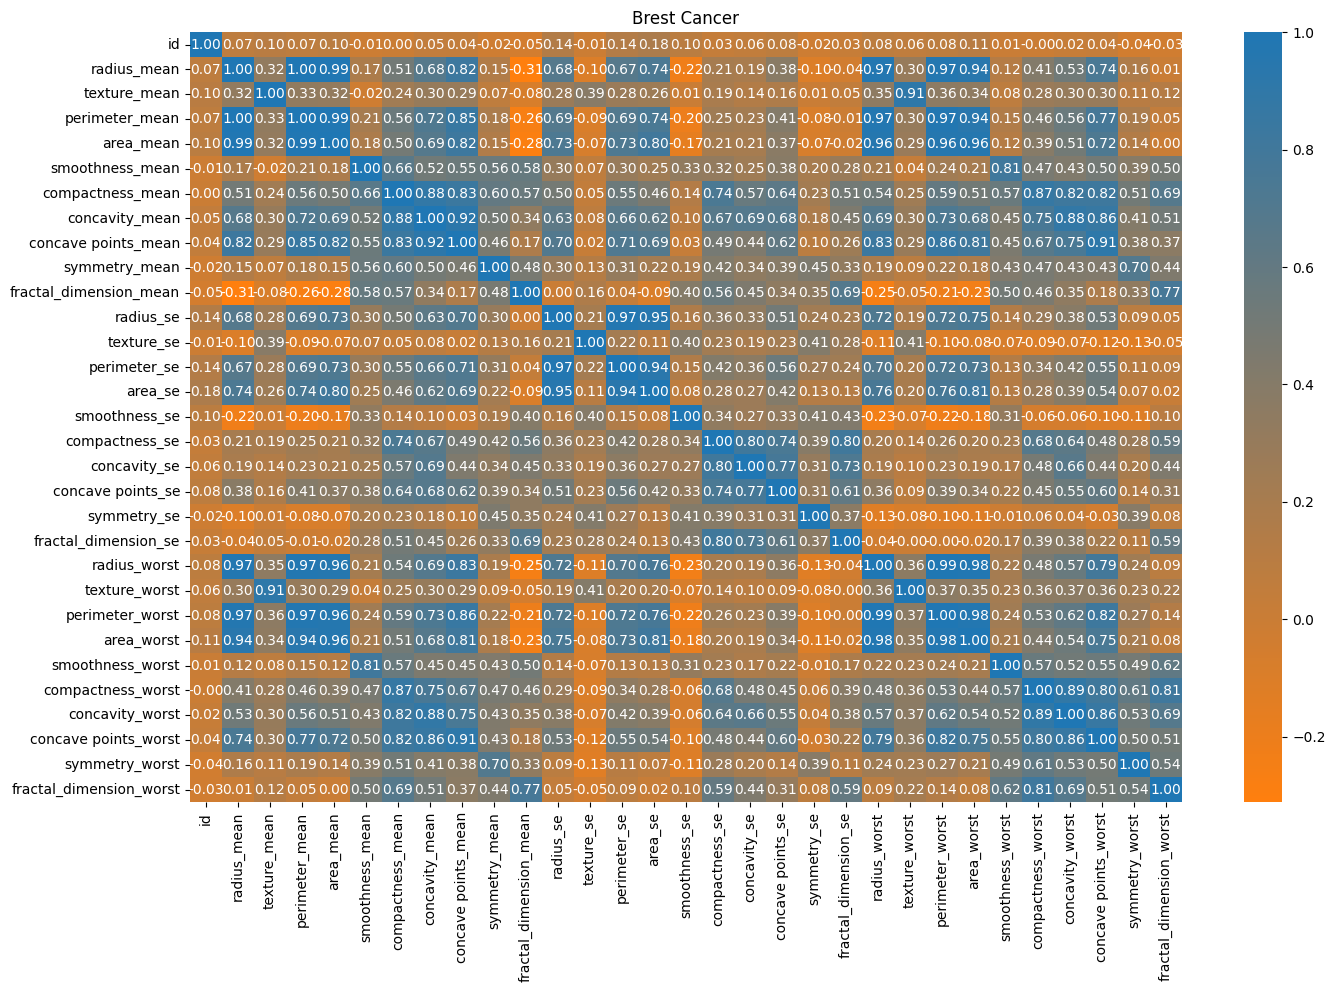

In [19]:
# Matrice de correlation
corr = data.corr()
plt.figure(figsize= (16, 10))
custom_palette = ["#ff7f0e", "#1f77b4"]
plot = sns.heatmap(corr, annot = True, fmt= '.2f', cmap=cmap_gradient )
plot.set_title("Brest Cancer")

In [21]:
diagnosis_df = data.groupby(by=["diagnosis"]).sum()
diagnosis_df

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,9476145391,4336.309,6395.57,27872.92,165216.1,33.01452,28.59021,16.442571,9.181114,62.1844,...,4776.589,8394.88,31061.12,199527.1,44.61054,65.21410,59.346867,26.576631,96.4778,28.36082
M,7805426694,3702.120,4580.24,24457.46,207415.8,21.81448,30.77981,34.084240,18.653880,40.8967,...,4480.580,6215.46,29970.51,301524.7,30.70719,79.46271,95.528380,38.634310,68.5752,19.40435


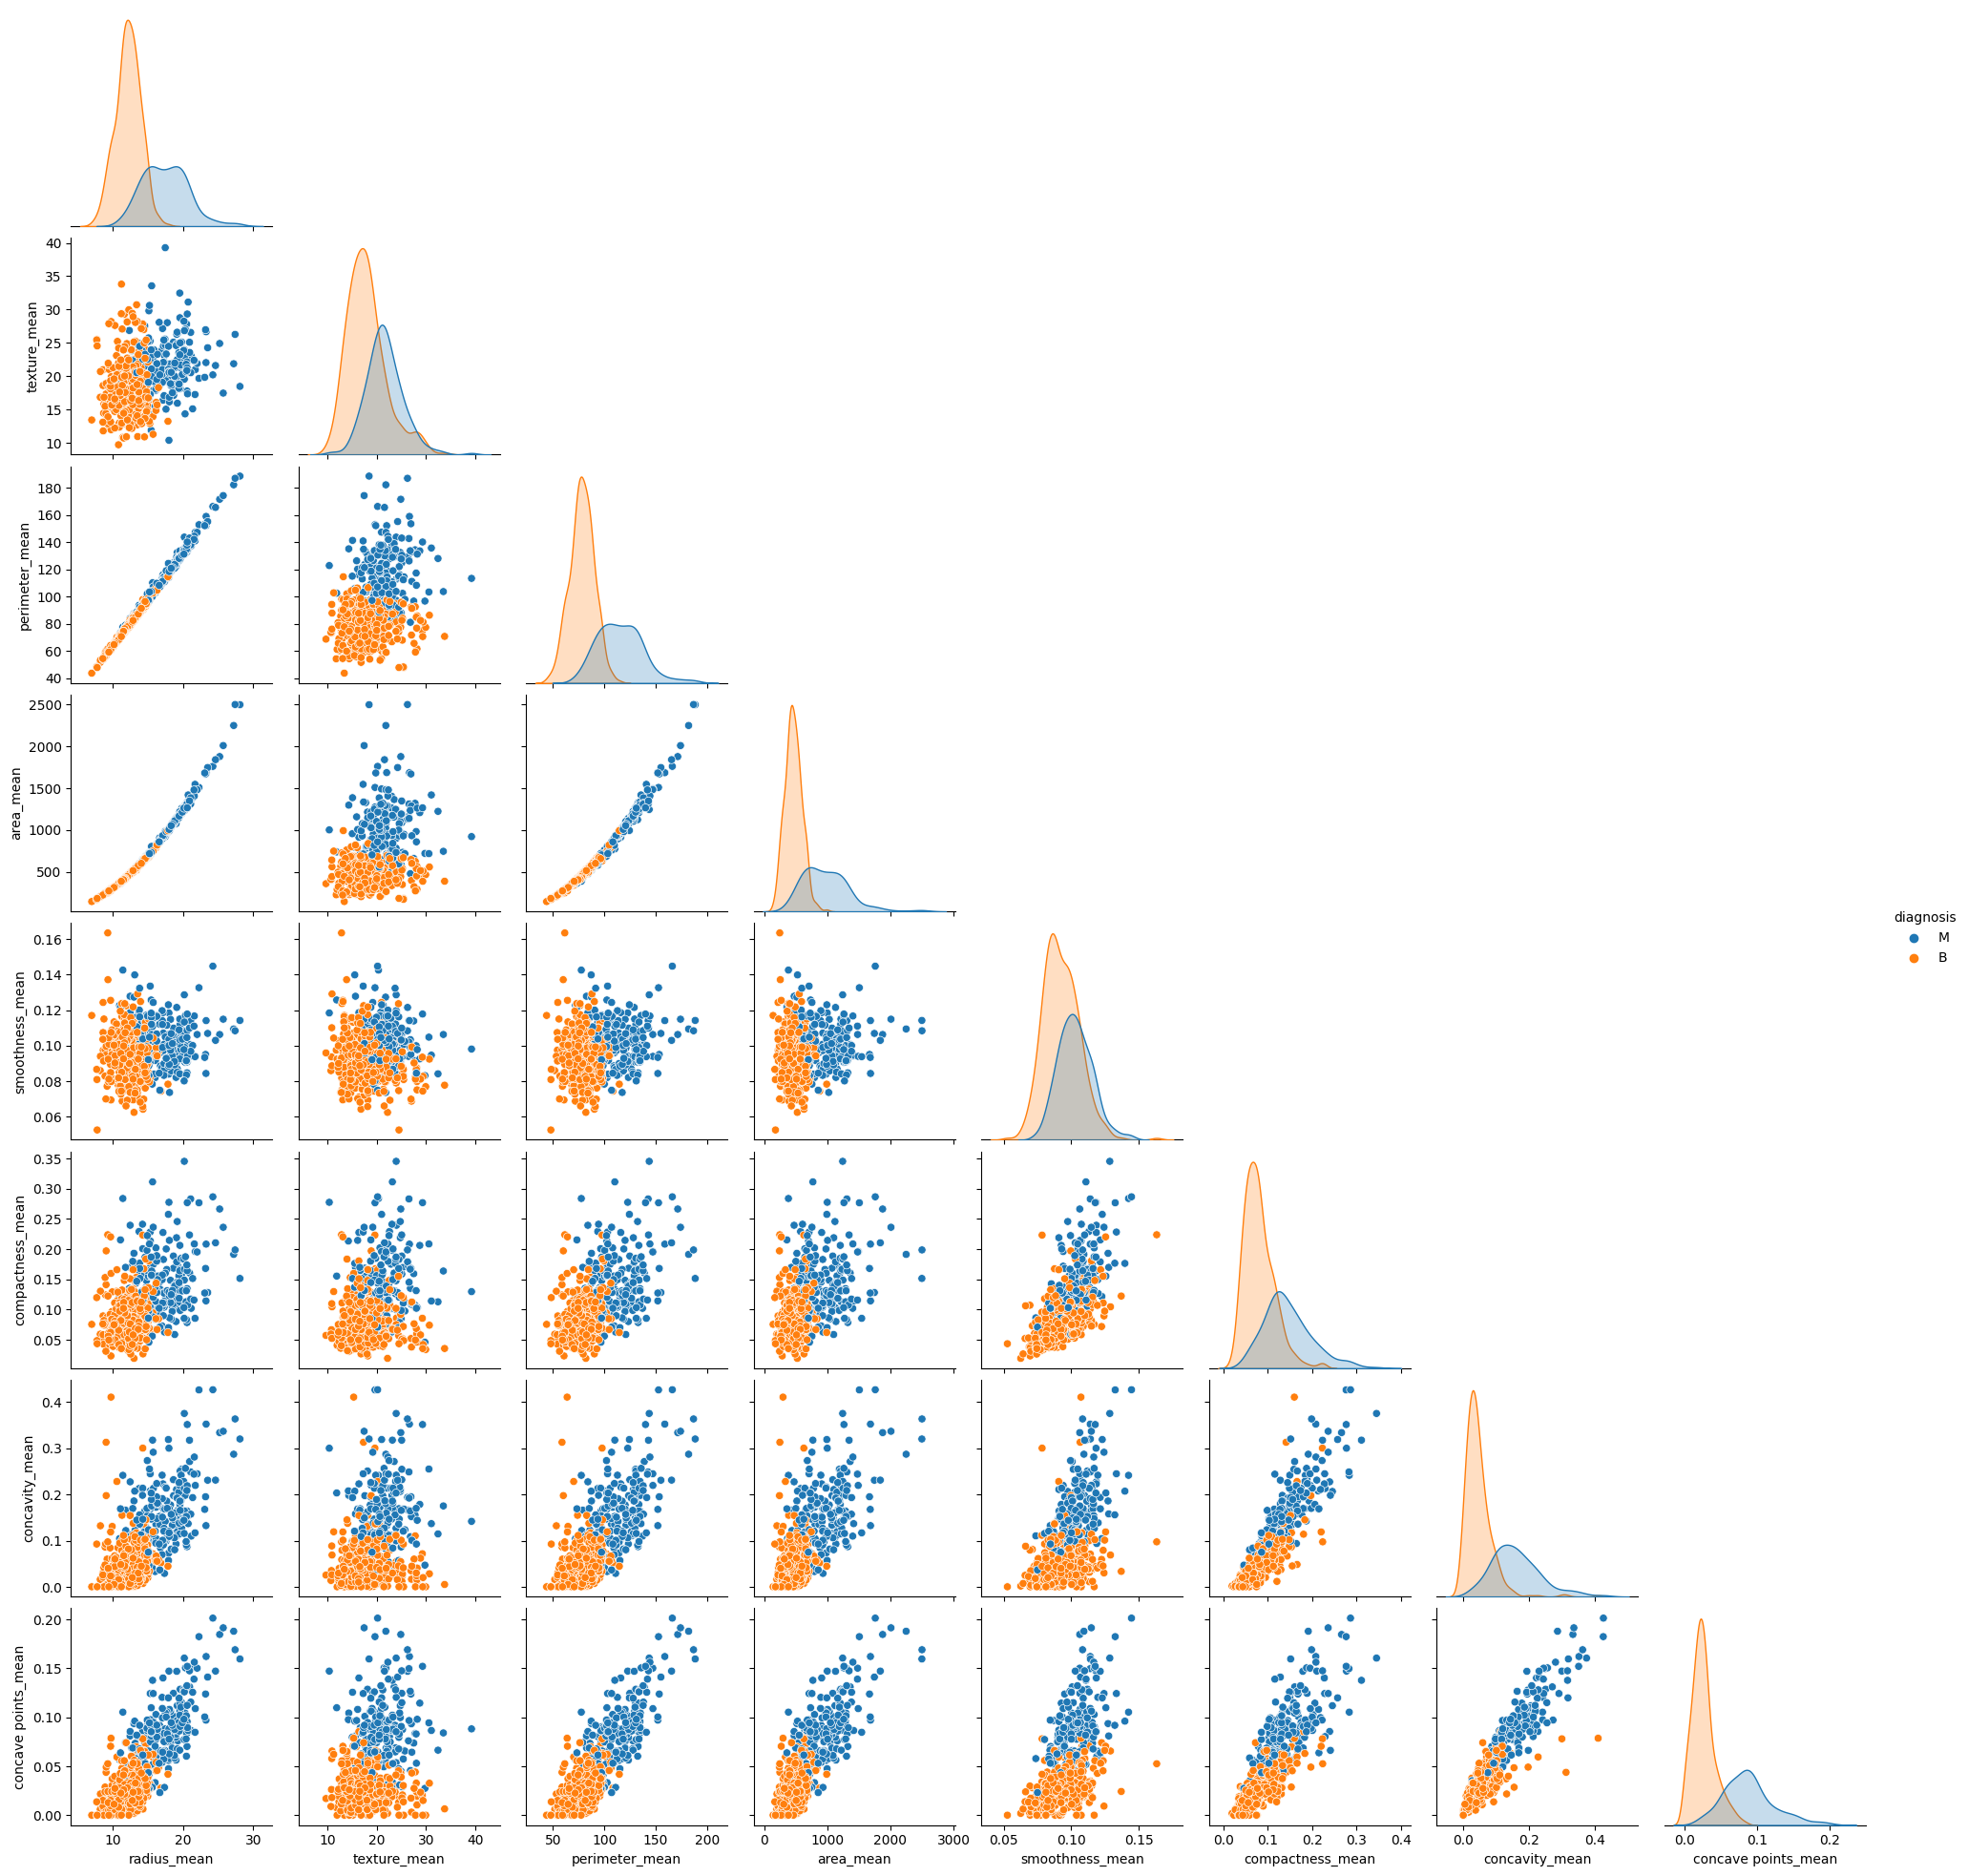

In [56]:
sns.pairplot(data.iloc[: ,1:10],corner = True, hue = 'diagnosis')

radius_mean                    AxesSubplot(0.125,0.77;0.110714x0.11)
texture_mean                AxesSubplot(0.257857,0.77;0.110714x0.11)
perimeter_mean              AxesSubplot(0.390714,0.77;0.110714x0.11)
area_mean                   AxesSubplot(0.523571,0.77;0.110714x0.11)
smoothness_mean             AxesSubplot(0.656429,0.77;0.110714x0.11)
compactness_mean            AxesSubplot(0.789286,0.77;0.110714x0.11)
concavity_mean                AxesSubplot(0.125,0.638;0.110714x0.11)
concave points_mean        AxesSubplot(0.257857,0.638;0.110714x0.11)
symmetry_mean              AxesSubplot(0.390714,0.638;0.110714x0.11)
fractal_dimension_mean     AxesSubplot(0.523571,0.638;0.110714x0.11)
radius_se                  AxesSubplot(0.656429,0.638;0.110714x0.11)
texture_se                 AxesSubplot(0.789286,0.638;0.110714x0.11)
perimeter_se                  AxesSubplot(0.125,0.506;0.110714x0.11)
area_se                    AxesSubplot(0.257857,0.506;0.110714x0.11)
smoothness_se              AxesSub

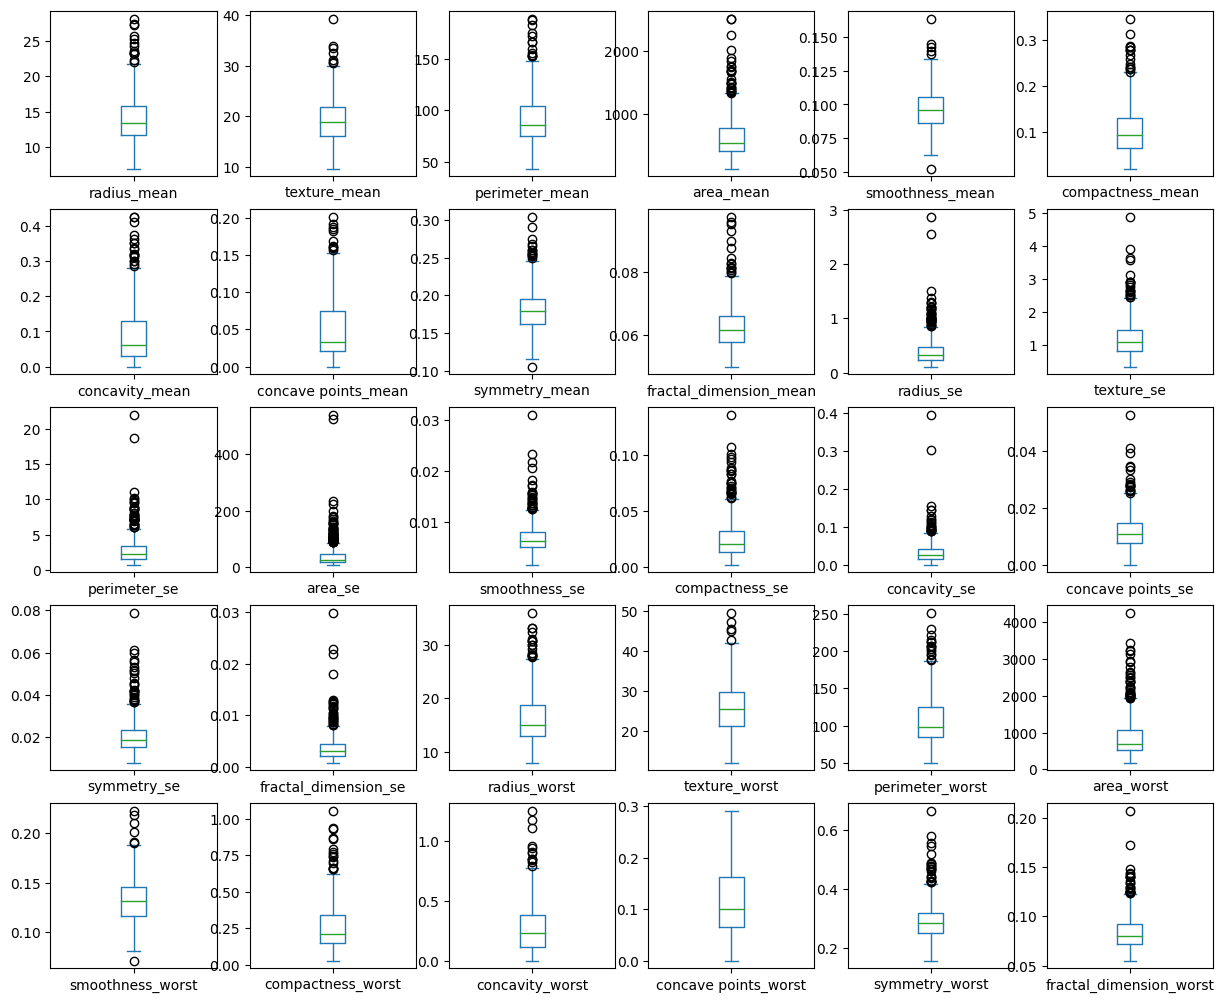

In [64]:
data.iloc[: ,1:].plot(kind = "box", subplots = True, layout = (6,6), figsize = (15,15))

# Preprocessing

In [77]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Il faut encoder la colonne diagnosis

In [82]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False,drop="if_binary").fit(data[["diagnosis"]])
encoded = enc.transform(data[["diagnosis"]])
encoded_df = pd.DataFrame(encoded, columns=enc.get_feature_names_out())
data_one_hot = pd.concat([data,encoded_df],axis=1)
data_one_hot = data_one_hot.drop(["diagnosis", "id"],axis=1)

In [83]:
data_one_hot 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1.0


In [84]:
data_one_hot.to_pickle("./data/data_final.pkl") 